In [238]:
!unzip 'archive(2).zip' -d /content/data

Archive:  archive(2).zip
replace /content/data/Student_Marks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/Student_Marks.csv  


In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
import torch
import torch.nn as nn

In [258]:
data = pd.read_csv('/content/data/Student_Marks.csv')

In [259]:
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [260]:
len(data)

100

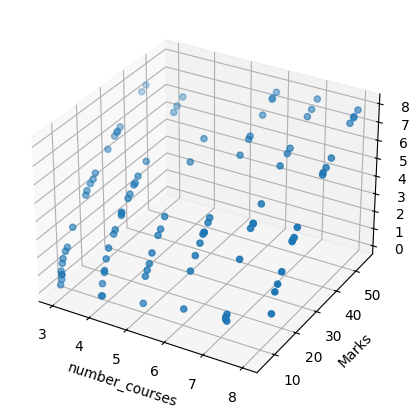

In [261]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(projection='3d')
ax.set_zlabel('time_study')
ax.set_xlabel('number_courses')
ax.set_ylabel('Marks')
ax.scatter(data['number_courses'],data['Marks'],data['time_study'],)

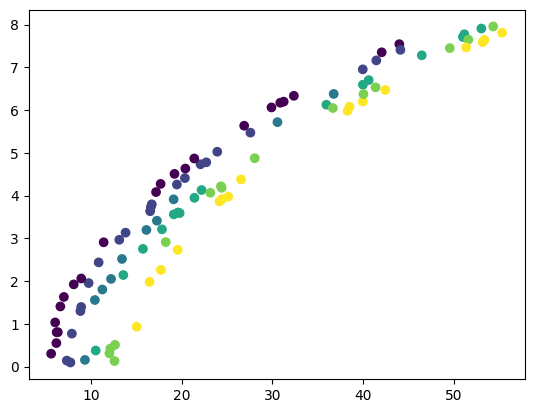

In [262]:
plt.scatter(data['Marks'],data['time_study'],c=data['number_courses'])

In [263]:
class StudentPerformancePredictionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_1 = nn.Linear(in_features=1, out_features=10)
        self.linear_layer_2 = nn.Linear(in_features=1, out_features=10)
        self.hidden_layer = nn.Linear(in_features=20, out_features=10)
        self.output_layer = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # Non-linearity

    def forward(self, number_courses, time_study):
        # Pass inputs through their respective layers
        number_courses = self.relu(self.linear_layer_1(number_courses))
        time_study = self.relu(self.linear_layer_2(time_study))

        # Concatenate the results
        x = torch.cat((number_courses, time_study), dim=1)

        # Hidden layer with non-linearity
        x = self.relu(self.hidden_layer(x))

        # Final output
        return self.output_layer(x)


In [264]:
model_2 = StudentPerformancePredictionModelV2()

In [265]:
num_courses = torch.tensor(data['number_courses'].values).type(torch.float32).unsqueeze(dim=1)
time_study = torch.tensor(data['time_study'].values).type(torch.float32).unsqueeze(dim=1)
marks = torch.tensor(data['Marks'].values).type(torch.float32).squeeze()

In [266]:
optimizer = torch.optim.Adam(params=model_2.parameters(),lr=0.01)
loss = nn.MSELoss()

In [267]:
Train_loss = []
epochs = []

EPOCH = 1000

for epoch in range(EPOCH):
  t_loss = 0
  for num_course,time,mark in zip(num_courses,time_study,marks):
    num_course = torch.tensor([[num_course]], dtype=torch.float32)
    time = torch.tensor([[time]], dtype=torch.float32)
    mark = torch.tensor([[mark]], dtype=torch.float32)
    model_2.train()
    y_pred = model_2(num_course,time)
    train_loss = loss(y_pred,mark)
    t_loss += train_loss.item()
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
  Train_loss.append(t_loss)
  epochs.append(epoch)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {train_loss} ")

Epoch: 0 | Train loss: 61.17074203491211 
Epoch: 100 | Train loss: 0.3763408660888672 
Epoch: 200 | Train loss: 0.08439283818006516 
Epoch: 300 | Train loss: 1.1736992746591568e-06 
Epoch: 400 | Train loss: 0.00035067612770944834 
Epoch: 500 | Train loss: 0.0024562478065490723 
Epoch: 600 | Train loss: 0.0064786579459905624 
Epoch: 700 | Train loss: 0.013352032750844955 
Epoch: 800 | Train loss: 0.030226826667785645 
Epoch: 900 | Train loss: 0.05787946283817291 


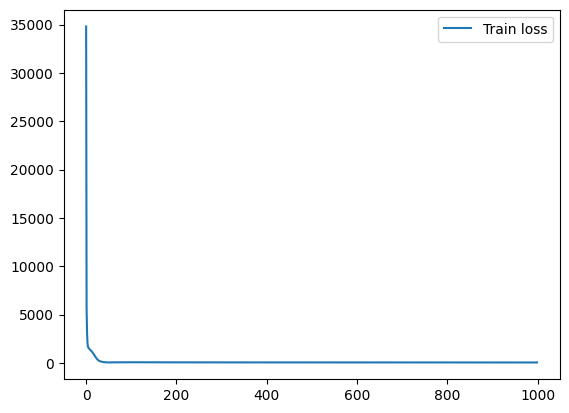

In [268]:
plt.plot(epochs,Train_loss,label='Train loss')
plt.legend()

In [269]:
pred_marks = model_2(num_courses,time_study)

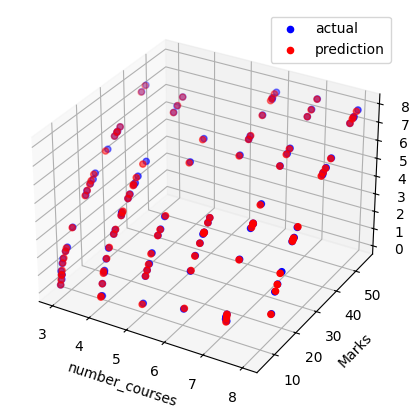

In [270]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(projection='3d')
ax.set_zlabel('time_study')
ax.set_xlabel('number_courses')
ax.set_ylabel('Marks')
ax.scatter(data['number_courses'],data['Marks'],data['time_study'],c='b',label = "actual")
ax.scatter(data['number_courses'],pred_marks.detach().numpy(),time_study,c='r',label='prediction')
ax.legend()

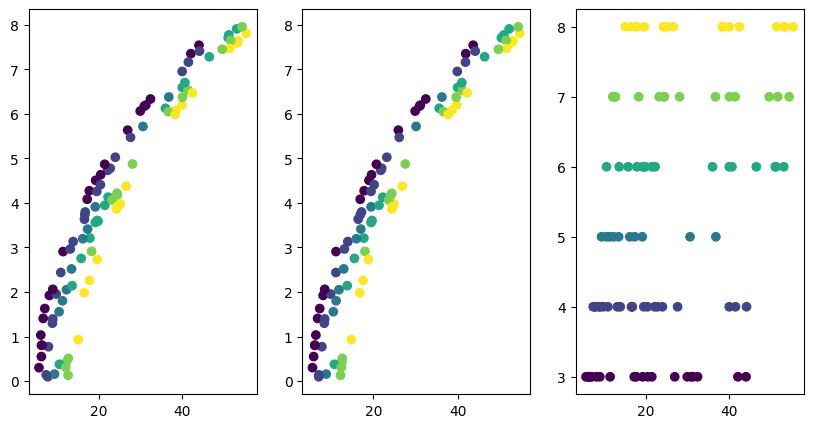

In [273]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.scatter(data['Marks'],data['time_study'],c=data['number_courses'])
plt.subplot(1,3,2)
plt.scatter(model_2(num_courses,time_study).detach().numpy(),data['time_study'],c=data['number_courses'])
plt.subplot(1,3,3)
plt.scatter(data['Marks'],data['number_courses'],c=data['number_courses'])

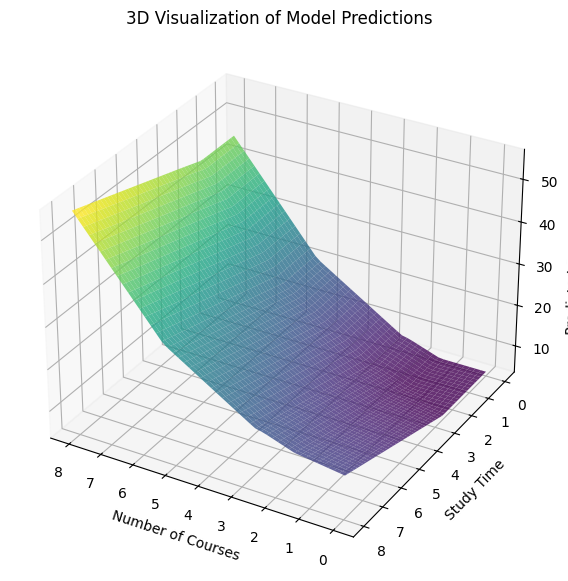

In [274]:
num_courses_range = torch.linspace(0, max(data['number_courses']), 50)  # Range for number of courses
time_study_range = torch.linspace(0, max(data['time_study']), 50)   # Range for study time

# Create a grid of inputs
num_courses_grid, time_study_grid = torch.meshgrid(num_courses_range, time_study_range)
num_courses_grid = num_courses_grid.reshape(-1, 1)
time_study_grid = time_study_grid.reshape(-1, 1)

# Pass data through the model
with torch.no_grad():
    predictions = model_2(num_courses_grid, time_study_grid).reshape(50, 50)

# Convert to numpy for plotting
num_courses_grid = num_courses_range.numpy()
time_study_grid = time_study_range.numpy()
predictions = predictions.numpy()

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D surface plot
X, Y = np.meshgrid(num_courses_grid, time_study_grid)
ax.plot_surface(X, Y, predictions, cmap='viridis', alpha=0.8)

# Label the axes
ax.set_title('3D Visualization of Model Predictions')
ax.set_xlabel('Number of Courses')
ax.set_ylabel('Study Time')
ax.set_zlabel('Predicted Performance')

ax.view_init(elev=30, azim=120)

plt.show()

In [275]:
torch.save(model_2.state_dict(),'StudentPerformancePredictionModelV2.pth')